In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.shape

(215, 15)

In [4]:
data.isnull().sum()  

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.dtypes   

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [7]:
data.describe().round()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.0,215.0,215.0,215.0,215.0,215.0,148.0
mean,108.0,67.0,66.0,66.0,72.0,62.0,288655.0
std,62.0,11.0,11.0,7.0,13.0,6.0,93457.0
min,1.0,41.0,37.0,50.0,50.0,51.0,200000.0
25%,54.0,61.0,61.0,61.0,60.0,58.0,240000.0
50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
75%,162.0,76.0,73.0,72.0,84.0,66.0,300000.0
max,215.0,89.0,98.0,91.0,98.0,78.0,940000.0


In [9]:
data['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [10]:
data['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [11]:
data['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [12]:
data['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [13]:
data['degree_t'].value_counts() 

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [14]:
data['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [15]:
data['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [16]:
data['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

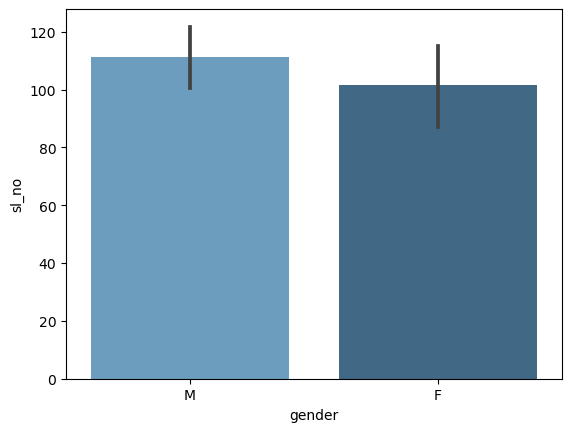

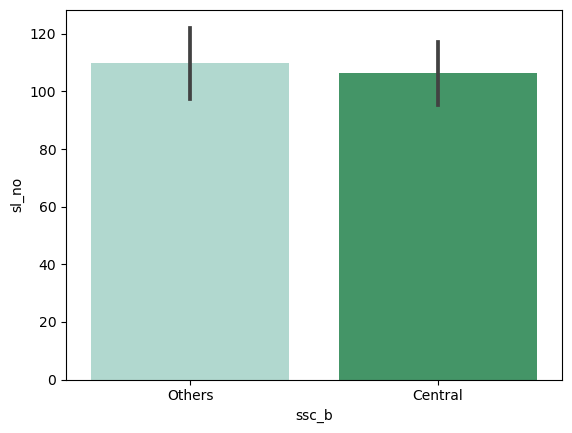

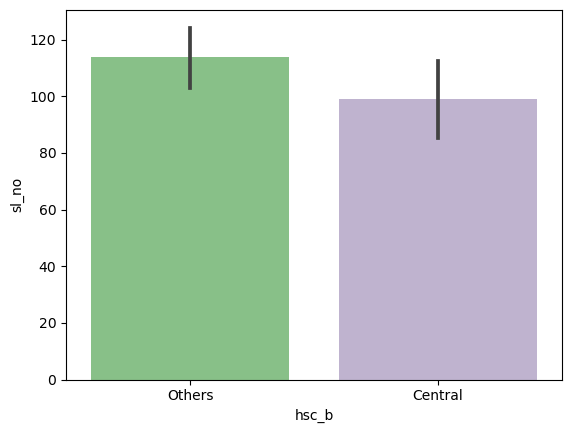

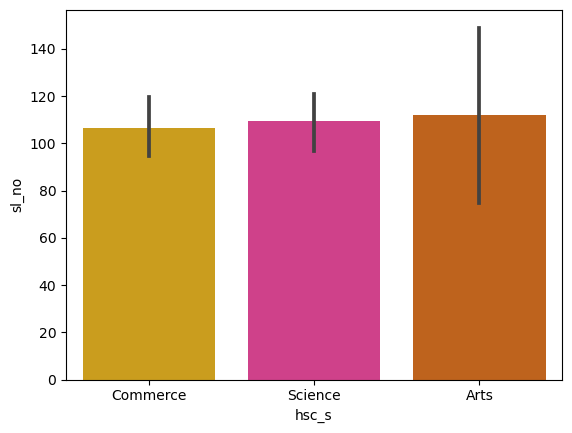

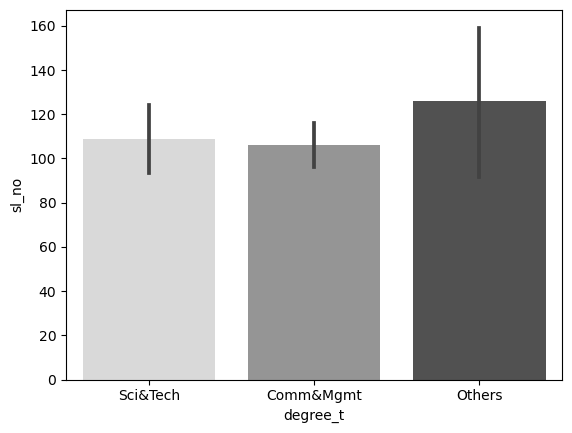

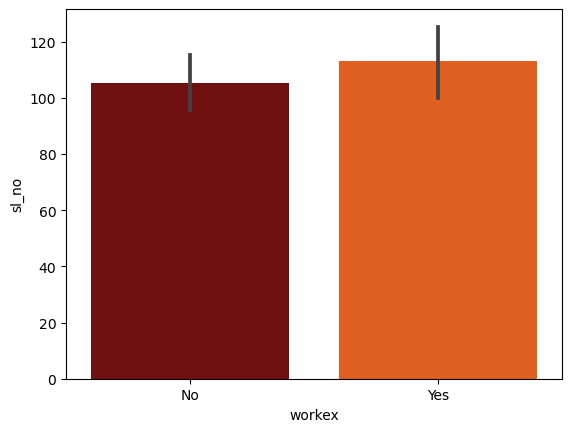

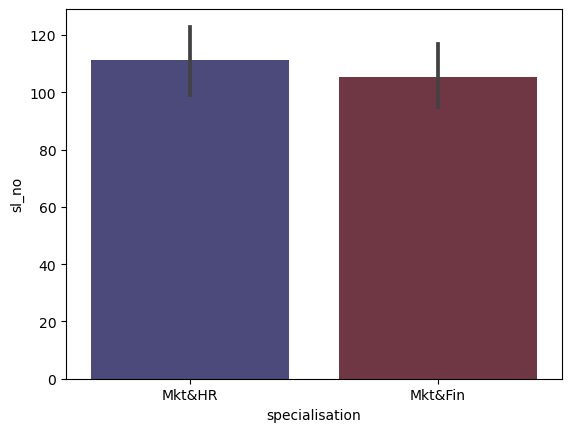

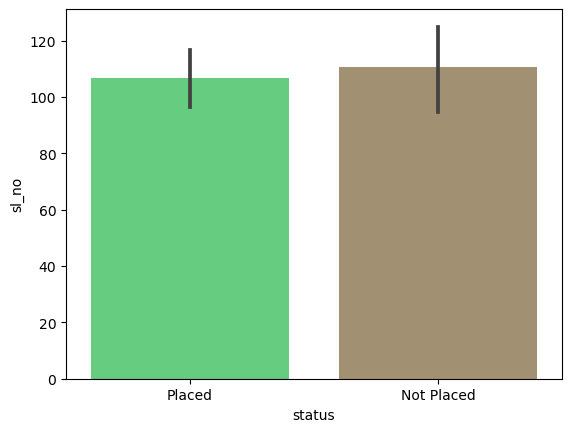

In [18]:
def barplot(col,col1,datas,color):
    sns.barplot(x=col, y=col1 ,data=datas, palette=color)
    plt.show()
barplot('gender','sl_no',data,'Blues_d')
barplot('ssc_b','sl_no',data,'BuGn')
barplot('hsc_b','sl_no',data,'Accent')
barplot('hsc_s','sl_no',data,'Dark2_r') 
barplot('degree_t','sl_no',data,'Greys')
barplot('workex','sl_no',data,'gist_heat')
barplot('specialisation','sl_no',data,'icefire')
barplot('status','sl_no',data,'terrain') 

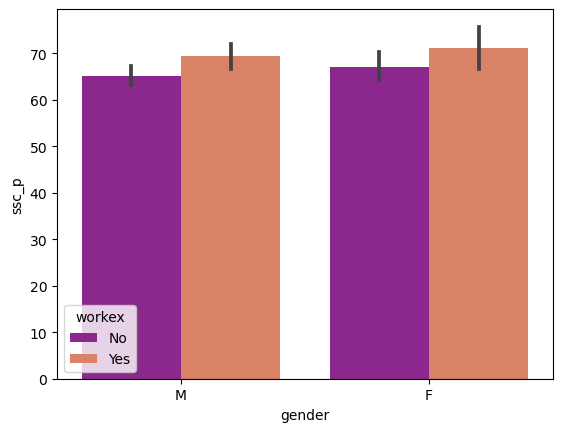

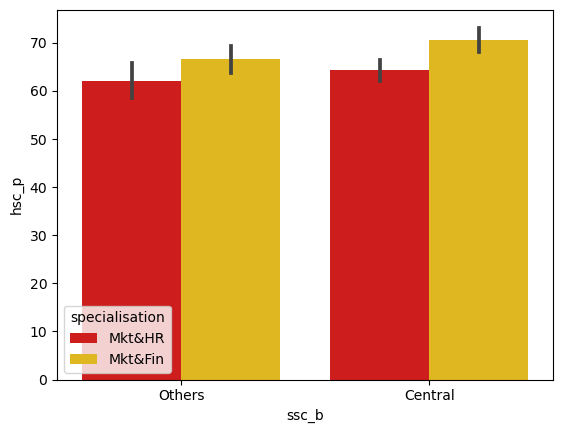

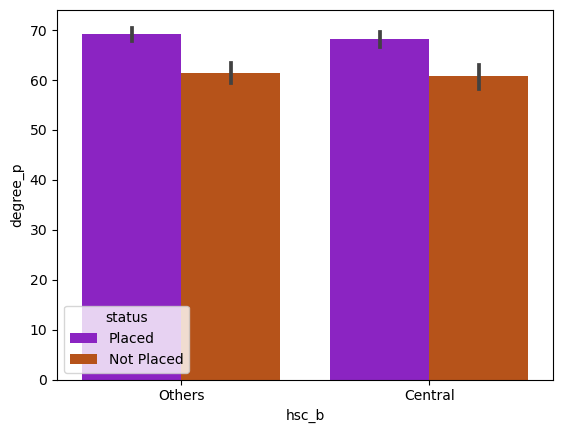

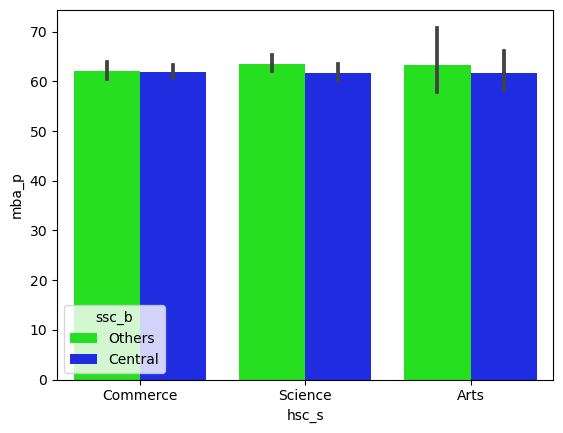

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


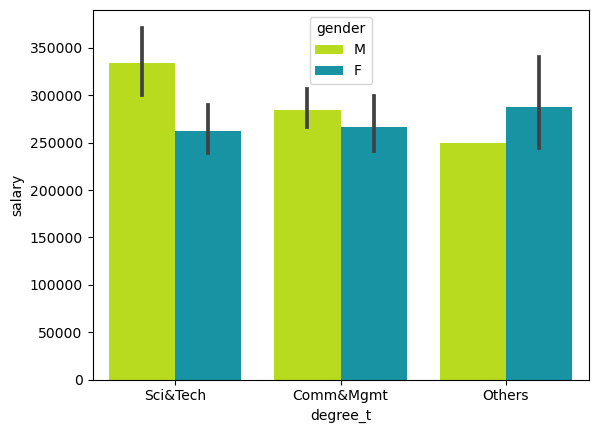

In [19]:
def barplot(col,col1,datas,cr,color):
    sns.barplot(x=col, y=col1 ,data=datas,hue=cr, palette=color)
    plt.show()
barplot('gender','ssc_p',data,'workex', 'plasma')
barplot('ssc_b','hsc_p',data,'specialisation', 'hot')
barplot('hsc_b','degree_p',data,'status', 'gnuplot')
barplot('hsc_s','mba_p',data,'ssc_b', 'hsv')
barplot('degree_t','salary',data,'gender', 'nipy_spectral_r')

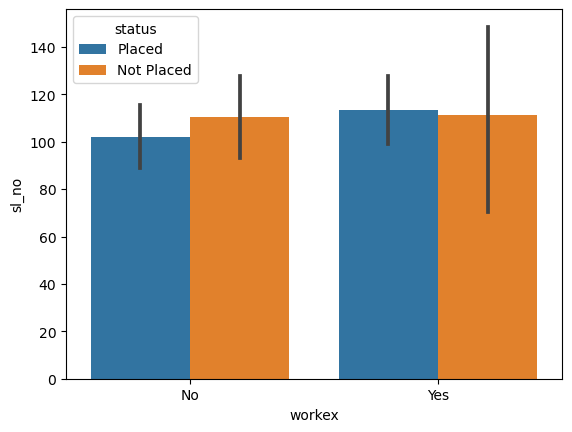

In [20]:
sns.barplot(x='workex', y='sl_no', hue='status', data=data)
plt.show()

In [23]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
df_numeric = data[numerical_columns]

In [24]:
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

             sl_no     ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
sl_no     1.000000 -0.078155 -0.085711 -0.088281  0.063636  0.022327  0.063764
ssc_p    -0.078155  1.000000  0.511472  0.538404  0.261993  0.388478  0.035330
hsc_p    -0.085711  0.511472  1.000000  0.434206  0.245113  0.354823  0.076819
degree_p -0.088281  0.538404  0.434206  1.000000  0.224470  0.402364 -0.019272
etest_p   0.063636  0.261993  0.245113  0.224470  1.000000  0.218055  0.178307
mba_p     0.022327  0.388478  0.354823  0.402364  0.218055  1.000000  0.175013
salary    0.063764  0.035330  0.076819 -0.019272  0.178307  0.175013  1.000000


In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

# Q. what is the percentage of male or female number of students in college?

In [31]:
gender_counts = data.gender.value_counts()

In [29]:
gender_total=data['gender'].value_counts()

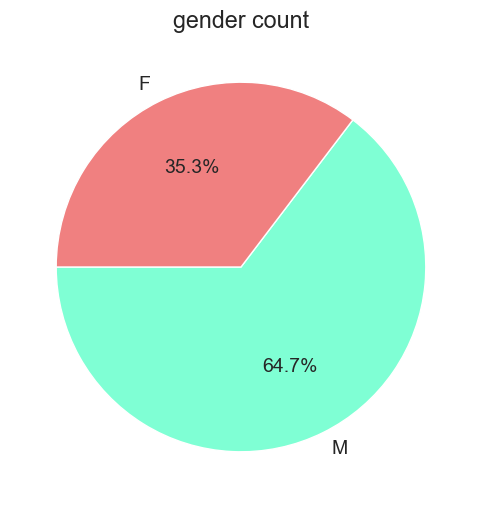

In [32]:
plt.figure(figsize=(12,6))
plt.title("gender count")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180,colors =['aquamarine', 'lightcoral']);

From this pie chart, we are getting an insight that percentage of getting placed from campus is more for male students than female. It might be possible that, there is less number of female student in any particular field or in college . But we are seeing, a huge difference(approx double) through this graph.

#Q2. What is the number of placed and not placed students categorized by gender, specialisation and work experience?

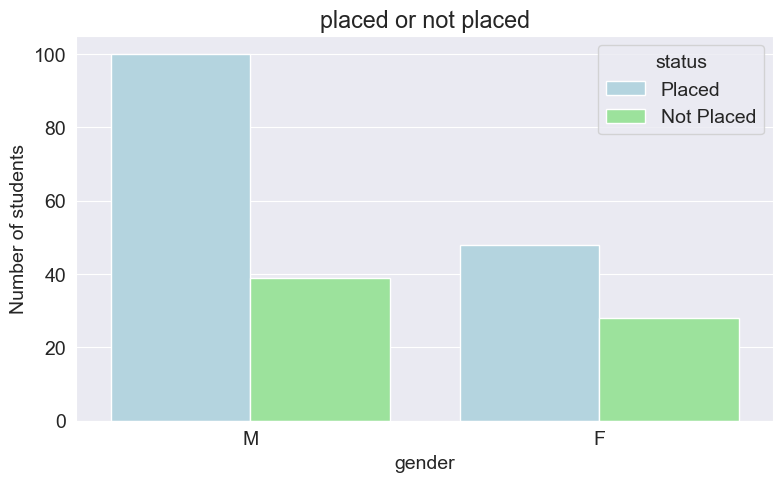

In [33]:
sns.countplot(x = data.gender, hue = data.status, palette =['lightblue', 'lightgreen'])
plt.title('placed or not placed')
plt.xlabel('gender')
plt.ylabel('Number of students');

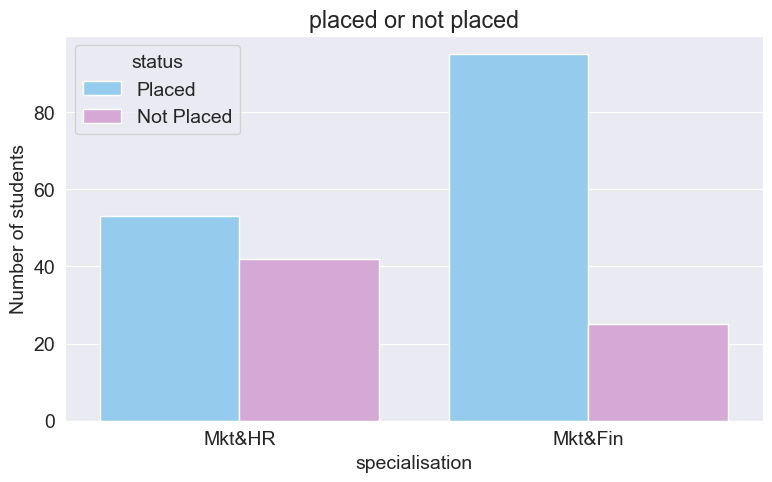

In [34]:
sns.countplot(x = data.specialisation, hue = data.status ,palette =['lightskyblue', 'plum'])
plt.title('placed or not placed')
plt.xlabel('specialisation')
plt.ylabel('Number of students');

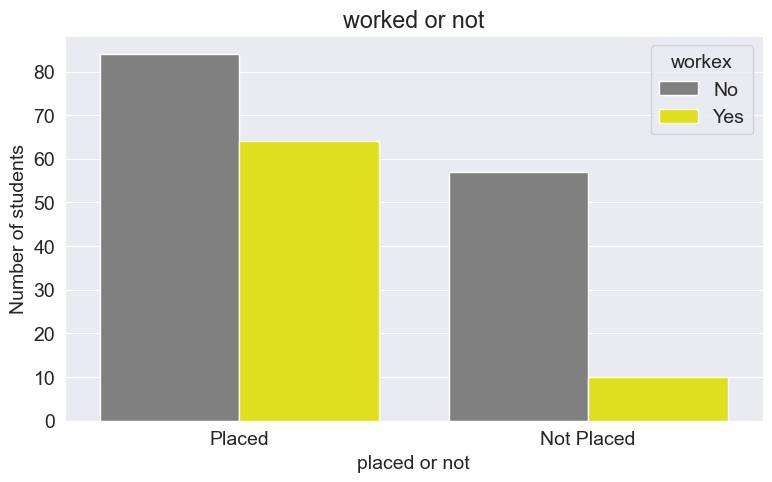

In [35]:
sns.countplot(x = data.status, hue = data.workex, palette =['grey', 'yellow'])
plt.title('worked or not')
plt.xlabel('placed or not')
plt.ylabel('Number of students');

Firstly,in gender and status garph , we see that more number of male students get placed whereas in female number of students the ratio is approx same.

Secondly,in specialisation and status graph, we see that those students who opted specialisation in mktandfin have more rate of getting placed than the students who opted mktandHR.

Thirdly, in stauts and workex graph, we that those students who don't have any working experience have more rate of not getting placed .

# Q. is there any difference we identify in percentage of different grades(like hsc,degree,mba) with salary?

In [36]:
import seaborn as sns

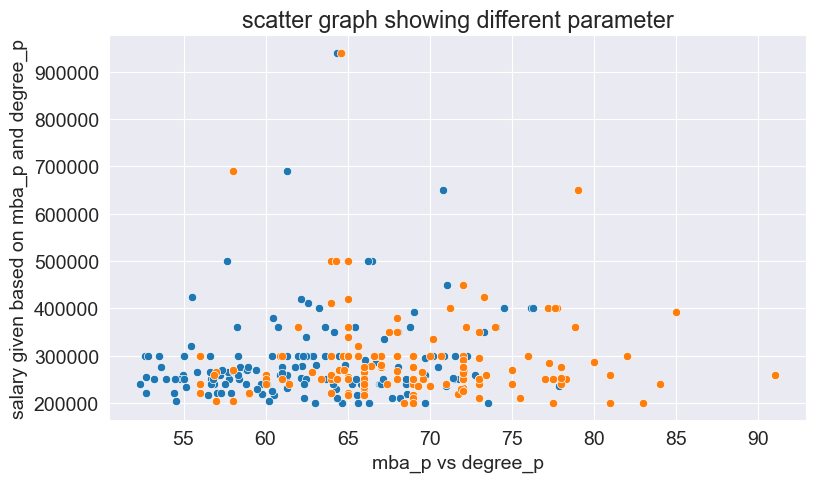

In [37]:
sns.scatterplot(x='mba_p', y='salary', data=data)
sns.scatterplot(x='degree_p', y='salary', data=data)
plt.title("scatter graph showing different parameter")
plt.xlabel("mba_p vs degree_p")
plt.ylabel("salary given based on mba_p and degree_p");

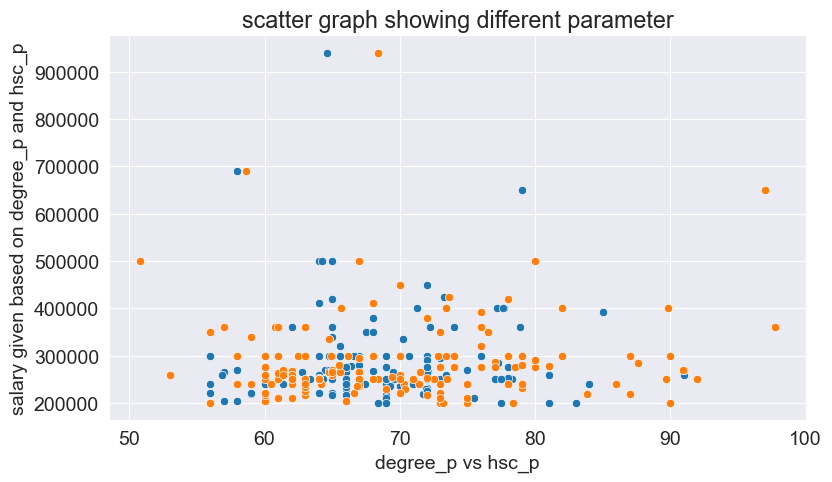

In [38]:
sns.scatterplot(x='degree_p', y='salary', data=data)
sns.scatterplot(x='hsc_p', y='salary', data=data)
plt.title("scatter graph showing different parameter")
plt.xlabel("degree_p vs hsc_p")
plt.ylabel("salary given based on degree_p and hsc_p");

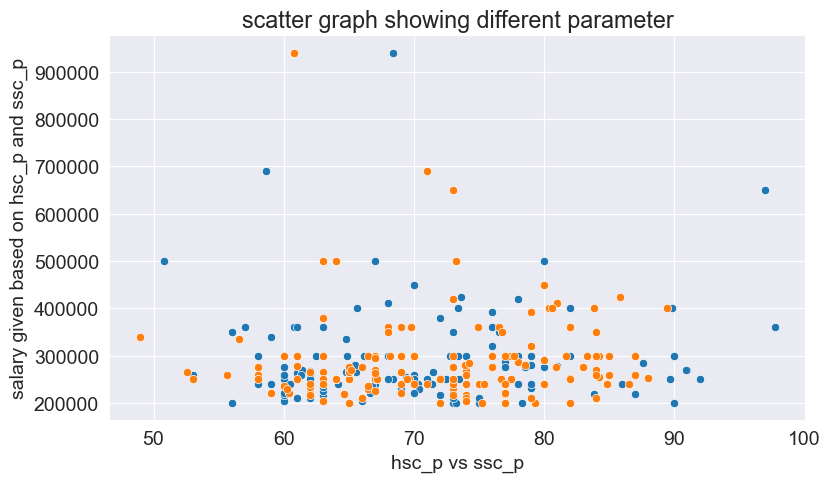

In [39]:
sns.scatterplot(x='hsc_p', y='salary', data=data)
sns.scatterplot(x='ssc_p', y='salary', data=data)
plt.title("scatter graph showing different parameter")
plt.xlabel("hsc_p vs ssc_p")
plt.ylabel("salary given based on hsc_p and ssc_p");

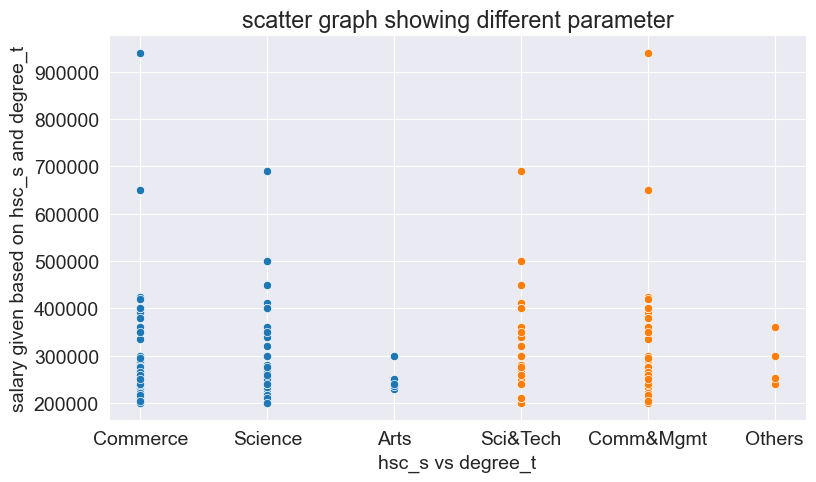

In [40]:
sns.scatterplot(x='hsc_s', y='salary', data=data)
sns.scatterplot(x='degree_t', y='salary', data=data)
plt.title("scatter graph showing different parameter")
plt.xlabel("hsc_s vs degree_t")
plt.ylabel("salary given based on hsc_s and degree_t");

From these graphs, we are seeing some insights like, the percentage of mba and degree students pursuing have much more effects on the salary offered to them in their recurtment whereas the percentage of higher secondary and senior secondary studies does not affects much package offered to the students in placement .

# Q. How much maximum salary get by a student? 

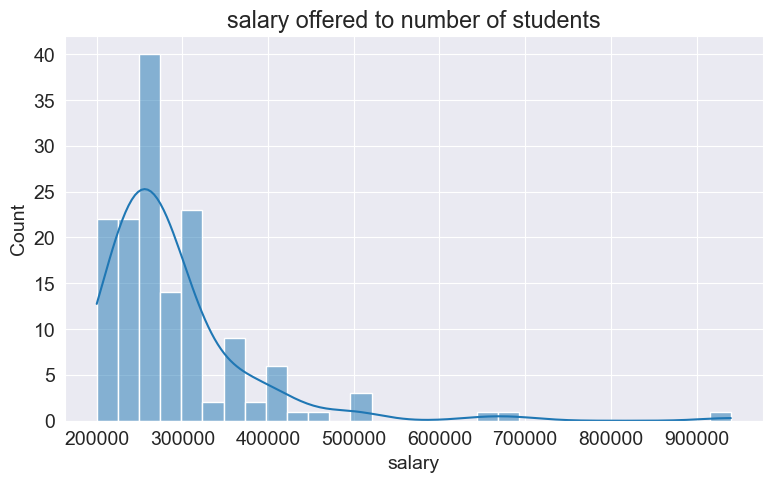

In [41]:
plt.title("salary offered to number of students")
sns.histplot(x=data.salary, bins=30, kde=True);

# Conclusion

We can say that the performance of students in their academic exams has a significant impact on their placement prospects. Students who performed well in their exams are more likely to secure job placements. based on this survey, we can say that the choice of degree specialization plays a crucial role in student placement. Certain fields of study, such as engineering, management, and computer science, have higher placement rates compared to others. based on this survey, we can say that there may be a gender disparity in student placement, with male students having higher placement rates than female students.